### Dataset Loading

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ad_spend.csv")
df.head()

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


In [8]:
df.shape

(200, 3)

In [9]:
g = df.groupby("Season")[["Ad Spend ($)", "Revenue ($)"]].mean()
g

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


<function matplotlib.pyplot.show(close=None, block=None)>

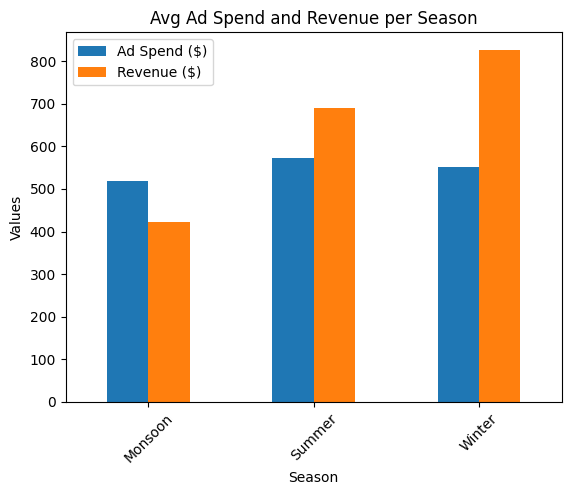

In [10]:
ax = g.plot(kind="bar")
ax.set_title("Avg Ad Spend and Revenue per Season")
ax.set_xlabel("Season")
ax.set_ylabel("Values")

plt.xticks(rotation=45)
plt.show

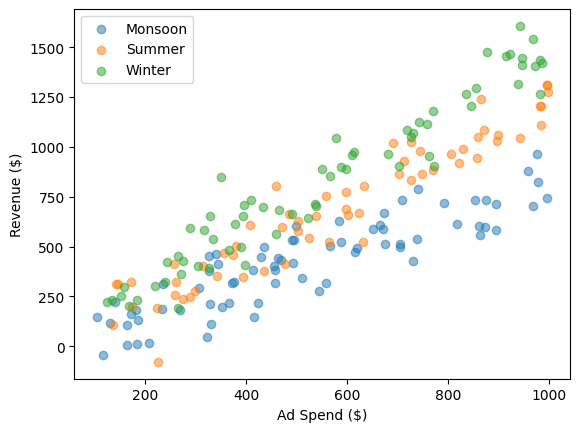

In [15]:
for season, subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"], subdf["Revenue ($)"], label=season, alpha=0.5)
plt.xlabel("Ad Spend ($)")
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

### One-Hot Encoding

In [17]:
df_encoded = pd.get_dummies(df, columns=["Season"], drop_first=True)
df_encoded.head()

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True


In [22]:
from sklearn.model_selection import train_test_split

X = df_encoded[["Ad Spend ($)", "Season_Summer", "Season_Winter"]]
y = df_encoded["Revenue ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

### Model Training : Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8882097000477289

### Model Training : Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8972778553142061

### Model Training : Gradient Boosting Model

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9149899654766234

In [27]:
y_pred = model.predict(X_test)

df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval.head()

,Actual,Predicted
59,605,677.144222
5,1125,1073.575312
20,699,626.698237
198,504,418.202801
52,1310,1134.088133


In [29]:
df_eval['Diff %'] = abs((df_eval['Predicted'] - df_eval['Actual']) * 100 / df_eval['Actual'])
df_eval.head()

,Actual,Predicted,Diff %
59,605,677.144222,11.924665
5,1125,1073.575312,4.571083
20,699,626.698237,10.343600
198,504,418.202801,17.023254
52,1310,1134.088133,13.428387
